In [1]:
import pandas as pd
import geopandas as gpd
import fiona
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as plt

import re,os
import numpy as np

import kml2geojson
import json
from util_detroit import kml_to_gpd, csv_with_x_y_to_gpd

pd.options.display.max_columns = None
pd.options.display.max_rows = 200

/Users/ahakso/.virtualenvs/detroit/lib/python3.8/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.9.1-CAPI-1.14.2). Conversions between both will be slow.
  warnings.warn(


# Certificates of compliance

In [9]:
raw = pd.read_csv('Certificates_Of_Compliance.csv').assign(record_status_date=lambda x: pd.to_datetime(x.record_status_date))

In [11]:
raw.head()

,X,Y,record_id,street_num,street_dir,street_name,street_type,task,status,record_status_date,parcel_id,lon,lat,ObjectId
0,-82.950085,42.409592,PMB2017-04897,15865.0,NaN,EVANSTON,NaN,Issue CofC,Issued,2020-03-12 00:00:00+00:00,21005344.,-82.950085,42.409592,1
1,-82.939505,42.375422,PMB2004-07456,1020.0,NaN,ALTER,NaN,Issue CofC,Issued,2019-03-28 00:00:00+00:00,21062699.,-82.939505,42.375422,2
2,-83.069530,42.435481,PMB2004-09370,19297.0,NaN,KLINGER,NaN,Issue CofC,Issued,2021-07-23 00:00:00+00:00,13023024-5,-83.069530,42.435481,3
3,-82.966053,42.413917,PMB2004-05381,14941.0,NaN,PROMENADE,NaN,Issue CofC,Issued,2019-08-06 00:00:00+00:00,21009167.,-82.966053,42.413917,4
4,NaN,NaN,PMB2005-13725,1148.0,W,FOREST,NaN,Issue CofC,Issued,2020-12-21 00:00:00+00:00,NaN,NaN,NaN,5


In [12]:
raw.notnull().sum()/raw.shape[0]

X                     0.967905
Y                     0.967905
record_id             0.998638
street_num            1.000000
street_dir            0.049796
street_name           0.998638
street_type           0.006613
task                  0.998638
status                0.998638
record_status_date    0.998638
parcel_id             0.968294
lon                   0.967905
lat                   0.967905
ObjectId              1.000000
dtype: float64

# RMS_Crime_Incidents

In [2]:
raw = pd.read_csv('RMS_Crime_Incidents.csv').assign(incident_timestamp=lambda x: pd.to_datetime(x.incident_timestamp))

/Users/ahakso/.virtualenvs/detroit/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (8,15,16) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [14]:
display(raw.head())

raw.notnull().sum()/raw.shape[0]

,X,Y,crime_id,report_number,address,offense_description,offense_category,state_offense_code,arrest_charge,charge_description,incident_timestamp,incident_time,day_of_week,hour_of_day,year,scout_car_area,precinct,block_id,neighborhood,council_district,zip_code,longitude,latitude,oid
0,-82.966183,42.394808,3005341,1612230009,Drexel St & Frankfort St,ARSON,ARSON,2099,20000,ARSON,2016-12-23 10:15:00+00:00,05:15:00,5,5,2016,0503,05,261635121003005,Chandler Park,4,48213,-82.966183,42.394808,1
1,-83.098845,42.375653,3006638,1612270168,Rosa Parks Blvd & Taylor St,ARSON,ARSON,2099,20000,ARSON,2016-12-27 11:00:00+00:00,06:00:00,2,6,2016,1008,10,261635331001002,North LaSalle,5,48206,-83.098845,42.375653,2
2,-83.025576,42.351934,3008220,1612310147,E Vernor Hwy & Prince Hall Dr,LARCENY - OTHER,LARCENY,2307,23007,LARCENY - OTHER,2016-12-31 09:00:00+00:00,04:00:00,6,4,2016,0706,07,261635168001027,McDougall-Hunt,5,48207,-83.025576,42.351934,3
3,-83.165529,42.366055,3013440,1701140106,W Chicago St & Pinehurst St,ARSON,ARSON,2099,20000,ARSON,2017-01-06 10:00:00+00:00,05:00:00,5,5,2017,0208,02,261635344002013,Barton-McFarland,7,48204,-83.165529,42.366055,4
4,-82.980652,42.445954,3014403,1701170183,Hoyt St & Bringard Dr,MOTOR VEHICLE THEFT,STOLEN VEHICLE,2401,24001,MOTOR VEHICLE THEFT,2017-01-17 23:51:00+00:00,18:51:00,2,18,2017,0902,09,261635031001019,Mohican Regent,3,48205,-82.980652,42.445954,5


X                      1.0
Y                      1.0
crime_id               1.0
report_number          1.0
address                1.0
offense_description    1.0
offense_category       1.0
state_offense_code     1.0
arrest_charge          1.0
charge_description     1.0
incident_timestamp     1.0
incident_time          1.0
day_of_week            1.0
hour_of_day            1.0
year                   1.0
scout_car_area         1.0
precinct               1.0
block_id               1.0
neighborhood           1.0
council_district       1.0
zip_code               1.0
longitude              1.0
latitude               1.0
oid                    1.0
dtype: float64

<AxesSubplot:>

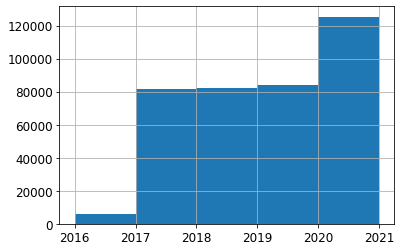

In [42]:
# raw.loc[:,['incident_timestamp','year']].sort_values('incident_timestamp').head(50)
raw.loc[:,['incident_timestamp','year']].year.hist(bins=np.arange(2016,2022))

# Rental_Statuses

In [17]:
raw = pd.read_csv('Rental_Statuses.csv',parse_dates=['date_status'])#.assign(incident_timestamp=lambda x: pd.to_datetime(x.incident_timestamp))

In [21]:
display(raw.head())

raw.loc[:,['X','date_status','record_type','task','status','owner_state','owner_city']].notnull().sum()/raw.shape[0]

,X,Y,record_id,street_num,street_dir,street_name,street_type,date_status,zip,record_type,owner_name,owner_address,owner_city,owner_state,owner_zip,task,status,parcel_id,oid,geom
0,-83.145248,42.359405,REG2020-00002,8809.0,NaN,BRYDEN,STREET,2020-01-10 05:00:00+00:00,48204,Rental Registration,JAMES KEMP,1608 MERRIWEATHER,TROY,MI,48085,Issue Registration,Issued,16024758-9,1,NaN
1,-82.991373,42.446367,REG2020-00004,20244.0,NaN,FAIRPORT,STREET,2020-03-18 04:00:00+00:00,48205,Rental Registration,JJMM PROPERTIES LLC,1549 NE 123RD ST,NORTH MIAMI,FL,NaN,Issue Registration,Issued,21031264.,2,NaN
2,-82.933253,42.427285,REG2020-00005,20300.0,NaN,MCCORMICK,STREET,2020-01-14 05:00:00+00:00,48224,Rental Registration,SHELFORD DEVELOPMENTS CORP,1549 NE 123RD ST,NORTH MIAMI,FL,33161,Issue Registration,Issued,21080181.,3,NaN
3,-82.935649,42.428698,REG2020-00006,20025.0,NaN,MCCORMICK,STREET,2020-03-17 04:00:00+00:00,48224,Rental Registration,WIFI GROUP LLC,1549 NE 123rd St,MIAMI,FL,33161,Issue Registration,Issued,21079954.,4,NaN
4,-82.995963,42.361128,REG2020-00007,2170.0,NaN,IROQUOIS,STREET,2020-01-14 05:00:00+00:00,48214,Rental Registration,NaN,NaN,NaN,NaN,NaN,Issue Registration,Issued,17007014.,5,NaN


X              0.916016
date_status    1.000000
record_type    0.999937
task           0.999937
status         0.999937
owner_state    0.941262
owner_city     0.988668
dtype: float64

In [20]:
[raw.date_status.min(), raw.date_status.max()]

[Timestamp('1970-01-01 00:00:00+0000', tz='UTC'),
 Timestamp('2021-05-27 04:00:00+0000', tz='UTC')]

In [ ]:
# 

In [23]:
persons = pd.read_csv('/Users/ahakso/Downloads/persons_us.csv')

In [25]:
pd.options.display.max_columns = None

In [27]:
persons.head(2)

,schema_version,profile_id,updated_month,full_name,position,location,country_code,about_me,social_connections,social_url,image_url,cover_image_url,websites.title,websites.url,websites_count,working_for.employer,working_for.type,working_for.social_url,working_for_count,experience.company_name,experience.location,experience.position,experience.job_description,experience.start_time,experience.end_time,experience.duration,experience.social_url,experience.image_url,experience_count,education.institution_name,education.description,education.degree,education.start_time,education.end_time,education.duration,education.social_url,education.image_url,education_count,certifications.certification_name,certifications.institution_name,certifications.credential_id,certifications.time,certifications.expiration,certifications.certificate_url,certifications.image_url,certifications_count,courses,courses_count,volunteering.position,volunteering.institution_name,volunteering.cause,volunteering.job_description,volunteering.start_time,volunteering.end_time,volunteering.duration,volunteering.social_url,volunteering.image_url,volunteering_count,projects.title,projects.description,projects.contributors.contributor_name,projects.contributors.contributor_url,projects.contributors.image_url,projects.start_time,projects.end_time,projects.duration,projects.project_url,projects.image_url,projects_count,languages.language,languages.proficiency,languages_count,publications.title,publications.published,publications.summary,publications.url,publications_count,patents.title,patents.legal,patents.summary,patents.contributors.contributor_name,patents.contributors.contributor_url,patents.contributors.image_url,patents.url,patents_count,awards,awards_count,recommendations,recommendations_count,social_activities.title,social_activities.attribution,social_activities.social_url,social_activities.image_url,social_activities_count,social_groups.group_name,social_groups.social_url,social_groups.image_url,social_groups_count,similar_names.full_name,similar_names.position,similar_names.location,similar_names.social_url,similar_names.image_url,similar_names_count,also_viewed.full_name,also_viewed.position,also_viewed.location,also_viewed.social_url,also_viewed.image_url,also_viewed_count
0,13,ea56f8ee9777c428,2021-11,Cynthia Vargas,"MBA, Finance and Accounting Professional",United States,us,NaN,12,https://www.linkedin.com/in/cynthia-vargas-6b4...,https://static-exp1.licdn.com/sc/h/244xhbkr7g4...,https://static-exp1.licdn.com/sc/h/5q92mjc5c51...,NaN,NaN,0,OneOC,Organization,https://www.linkedin.com/company/oneoc,1,OneOC,"Santa Ana, California, United States",Nonprofit Accounting Services,NaN,Feb-20,Present,1 year 10 months,https://www.linkedin.com/company/oneoc,https://media-exp1.licdn.com/dms/image/C4E0BAQ...,5,"University of California, Los Angeles",NaN,"Bachelor of Arts - BA, Economics",NaN,NaN,NaN,https://www.linkedin.com/school/ucla/,https://media-exp1.licdn.com/dms/image/C4D0BAQ...,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,CFO/Treasurer,Hope’s House,Social Services,NaN,Nov-02,Nov-04,2 years 1 month,NaN,https://static-exp1.licdn.com/sc/h/3dtfvv2esz5...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,NaN,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,0,Cynthia Vargas,Payroll Lead,"San Diego, CA",https://www.linkedin.com/in/cynthia-vargas-014...,https://media-exp1.licdn.com/dms/image/C5603AQ...,5,NaN,NaN,NaN,NaN,NaN,0
1,13,778da2918e8fbb24,2021-11,Nandita D.,Corporate Legal Assistant at The Parkoff Organ...,"Brooklyn, New York, United States",us,"Result-Oriented Corporate Legal Assistant, ade...",64,https://www.linkedin.com/in/nandita-d-38131150,https://media-exp1.licdn.com/dms/image/C4D03AQ...,https://media-exp1.licdn.com/dms/image/C4D16AQ...,NaN,NaN,0,The Parkoff Organization,Organization,https://www.linkedin.com/company/the-parkoff-o...,1,The Parkoff Organization,"New York, United States",Corporate Legal Assistant,• Handling heavy

In [5]:
raw = pd.read_csv('/Users/ahakso/Downloads/2021-10-31 thru 2022-01-28 transactions.csv',parse_dates=['Date'])

In [9]:
raw.head()

,Date,Account,Description,Category,Tags,Amount
0,2022-01-14,Bloomberg L.P. 401(k) Plan,Contribution,Retirement Contributions,NaN,252.00
1,2022-01-14,Bloomberg L.P. 401(k) Plan,Contribution,Retirement Contributions,NaN,186.27
2,2022-01-14,Bloomberg L.P. 401(k) Plan,Contribution,Retirement Contributions,NaN,120.54
3,2022-01-14,Bloomberg L.P. 401(k) Plan,Contribution,Retirement Contributions,NaN,120.00
4,2022-01-14,Bloomberg L.P. 401(k) Plan,Contribution,Retirement Contributions,NaN,88.70


In [8]:
raw.loc[lambda x: x.Date == pd.to_datetime('2022-01-14')].Amount.sum()

1330.4999999999998